Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0750 - loss: 3.0041 - val_accuracy: 0.2244 - val_loss: 2.6523
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2133 - loss: 2.5860 - val_accuracy: 0.3194 - val_loss: 2.2759
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2747 - loss: 2.3542 - val_accuracy: 0.3594 - val_loss: 2.0639
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3164 - loss: 2.1742 - val_accuracy: 0.4094 - val_loss: 1.9374
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3469 - loss: 2.0714 - val_accuracy: 0.4325 - val_loss: 1.8605
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3568 - loss: 2.0437 - val_accuracy: 0.4494 - val_loss: 1.8017
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3539 - loss: 2.0057 - val_accuracy: 0.4613 - val_loss: 1.7431
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3754 - loss: 1.9158 - val_accuracy: 0.4850 - val_

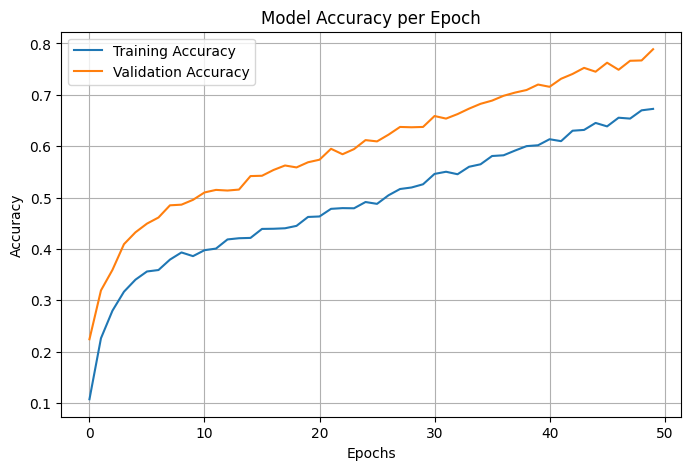

Model training complete and saved successfully!


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess data
def preprocess_data(df):
    X = df.drop(columns=["CustomerID", "PreferredCategory"])  # Features
    y = df["PreferredCategory"]  # Target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X_scaled, y_encoded, label_encoder, scaler

# Build deep learning model
def build_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
    return history

# Save model
def save_model(model, label_encoder, scaler, model_path="customer_pref_model.h5"):
    model.save(model_path)
    np.save("label_encoder_classes.npy", label_encoder.classes_)
    np.save("scaler_params.npy", [scaler.mean_, scaler.scale_])
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage (after training the model):
# plot_accuracy(history)


# Main execution
if __name__ == "__main__":
    df = load_data("customer_purchase_data.csv")
    X, y, label_encoder, scaler = preprocess_data(df)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = build_model(input_dim=X.shape[1], num_classes=len(np.unique(y)))
    history = train_model(model, X_train, y_train, X_val, y_val)
    plot_accuracy(history)
    save_model(model, label_encoder, scaler)
    print("Model training complete and saved successfully!")
